# EMPLOYEE PERFORMANCE ANALYSIS

## 1.IMPORTING LIBRARIES

In [1]:
# Data analysis and manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Over-sampling for imbalanced data
from imblearn.over_sampling import SMOTE

# Dimensionality reduction
from sklearn.decomposition import PCA

# Data splitting
from sklearn.model_selection import train_test_split

# Classification metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# ROC AUC visualization
from yellowbrick.classifier import ROCAUC

## 2. IMPORTING DATASET

In [2]:
data=pd.read_csv('preprocessed_dataset.csv')
print('SHAPE OF THE PREPROCESSED DATA:',data.shape)
data.sample(12)


SHAPE OF THE PREPROCESSED DATA: (1200, 27)


,Age,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,...,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,OverTime_Yes,Attrition_Yes,PerformanceRating
558,-0.651548,1,1,4,7,2,-0.876745,4,2,0.149401,...,-0.688233,4,-0.337007,-0.640834,-0.778981,-0.312239,1,0,0,3
438,1.330067,3,1,4,7,2,-0.754394,2,3,-1.137544,...,0.286832,3,-0.706667,-0.640834,-0.374491,-0.599025,0,0,0,4
753,0.339260,3,1,4,12,2,-0.876745,4,3,1.584840,...,-0.688233,3,-0.337007,-0.358425,-0.778981,-0.599025,0,0,0,3
1023,-0.651548,0,1,3,6,2,-0.876745,3,1,-0.197084,...,-1.663298,3,-0.891498,-0.640834,-0.374491,-1.172598,1,0,0,2
1131,0.559439,4,1,0,1,1,-0.509693,2,2,1.535342,...,1.261897,3,-0.891498,-0.640834,0.030000,-1.172598,1,0,0,3
833,0.119080,3,0,1,3,0,-0.387342,3,2,0.644380,...,0.286832,3,1.141634,1.900851,-0.374491,1.408480,0,1,0,3
562,0.999798,1,2,4,5,2,0.469113,4,3,-1.583025,...,0.286832,3,0.587144,0.771213,-0.778981,1.408480,1,0,0,3
741,2.100695,5,1,4,7,2,-0.264991,2,4,0.297895,...,1.261897,1,0.587144,1.336032,2.254698,1.121693,1,0,1,2
857,-1.422176,1,1,1,0,2,1.080866,1,2,-0.692063,...,-0.688233,3,-0.337007,-0.358425,-0.374491,-0.599025,1,0,0,3
482,-0.871727,1,0,2,4,1,-0.876745,1,1,1.040363,...,-2.150831,4,-0.152177,-0.076015,-0.374491,-0.312239,1,0,0,2


## 3. DATA SPLITTING

In [3]:
#independent features
x=data.iloc[:,:-1]

#dependent feature
y=data['PerformanceRating']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## 4. SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE

In [5]:
smote= SMOTE(random_state=42)
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [6]:
from collections import Counter

print("Class distribution before SMOTE:", Counter(y_train)) 
print("Class distribution after SMOTE:", Counter(y_train_smote))

Class distribution before SMOTE: Counter({3: 690, 2: 165, 4: 105})
Class distribution after SMOTE: Counter({2: 690, 3: 690, 4: 690})


## 5. MODEL CREATION

#### 5.1. LOGISTIC REGRESSION

In [7]:
#initializing the model
log_model=LogisticRegression(multi_class='multinomial')

#fitting the training data to the model
log_model.fit(x_train_smote,y_train_smote)

#predicting the target for the testing data
log_pred=log_model.predict(x_test)

In [8]:
#evaluating the model's performance
log_accuracy = accuracy_score(y_test, log_pred)
print(f"Test Accuracy: {log_accuracy}")
print(classification_report(y_test,log_pred))

Test Accuracy: 0.7291666666666666
              precision    recall  f1-score   support

           2       0.41      0.55      0.47        29
           3       0.89      0.76      0.82       184
           4       0.44      0.74      0.56        27

    accuracy                           0.73       240
   macro avg       0.58      0.68      0.61       240
weighted avg       0.78      0.73      0.75       240



<Axes: >

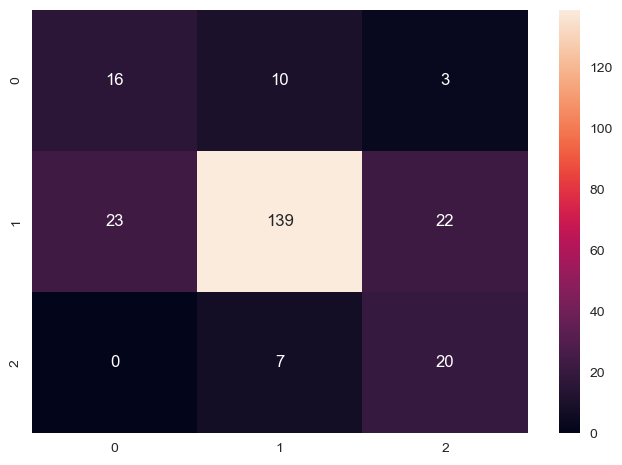

In [9]:
cm=confusion_matrix(y_test,log_pred)
sns.heatmap(cm,annot=True,fmt='g')

#### 5.2. DECISION TREE

In [10]:
dec_model=DecisionTreeClassifier()
dec_model.fit(x_train_smote,y_train_smote)
dec_pred=dec_model.predict(x_test)

In [11]:
#evaluating the model's performance
dec_accuracy = accuracy_score(y_test, dec_pred)
print(f"Test Accuracy: {dec_accuracy}")

Test Accuracy: 0.8833333333333333


#### 5.2.1. Hyperparameter Tuning

In [12]:
#creating a dictionary with best parameters
params={'criterion':('gini','entropy'),
        'splitter':('best','random'),
        'max_depth':(list(range(1,10))),
        'min_samples_split':[1,2,3,4,5,6],
        'min_samples_leaf':(list(range(1,10)))}

In [13]:
#initializing the model
dec_hpt_model=DecisionTreeClassifier()

In [14]:
#initializing RandomizedSearchCV
dec_cv=RandomizedSearchCV(estimator=dec_hpt_model,
                   param_distributions=params,
                   scoring='accuracy',
                   n_jobs=-1,
                   verbose=3,
                   cv=5
                  )

In [15]:
#fitting the training data to the RandomizedSearchCV
dec_cv.fit(x_train_smote,y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6],
                                        'splitter': ('best', 'random')},
                   scoring='accuracy', verbose=3)

In [16]:
#getting best hyperparameters
print(f'Best_Params:{dec_cv.best_params_}')

Best_Params:{'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 9, 'criterion': 'entropy'}


In [17]:
# fitting the data
best_dec = dec_cv.best_estimator_
dec_hp_pred = best_dec.predict(x_test)

# Evaluating the model's performance
dec_hp_accuracy = accuracy_score(y_test, dec_hp_pred)
print(f"Test Accuracy: {dec_hp_accuracy}")
print(classification_report(y_test,dec_hp_pred))

Test Accuracy: 0.8916666666666667
              precision    recall  f1-score   support

           2       0.73      0.93      0.82        29
           3       0.94      0.91      0.93       184
           4       0.76      0.70      0.73        27

    accuracy                           0.89       240
   macro avg       0.81      0.85      0.83       240
weighted avg       0.90      0.89      0.89       240



<Axes: >

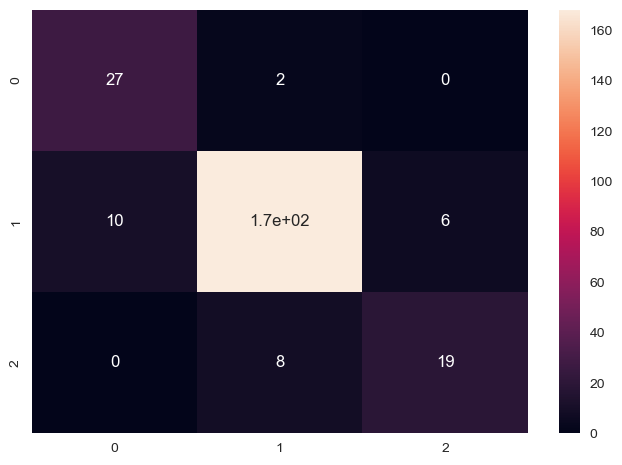

In [18]:
dec_cm=confusion_matrix(y_test,dec_hp_pred)
sns.heatmap(dec_cm,annot=True)

#### 5.3. RANDOM FOREST

In [19]:
RF_model=RandomForestClassifier()
RF_model.fit(x_train_smote,y_train_smote)
RF_pred=RF_model.predict(x_test)

In [20]:
RF_accuracy = accuracy_score(y_test, RF_pred)
print(f"Test Accuracy: {RF_accuracy}")

Test Accuracy: 0.925


#### 5.3.1. Hyperparameter Tuning

In [21]:
params={'n_estimators':[100,200,300],
        'max_features':['auto','log2','sqrt'],
        'max_depth':list(range(1,11)),
        'min_samples_split':list(range(1,11)),
        'min_samples_leaf':[1,2,3,4,5]
       }

In [22]:
RF_hpt_model=RandomForestClassifier()
RF_CV=RandomizedSearchCV(estimator=RF_hpt_model,
                   param_distributions=params,
                   scoring='accuracy',
                   cv=3,
                   verbose=3,
                   n_jobs=-1
                  )


In [23]:
RF_CV.fit(x_train_smote,y_train_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['auto', 'log2',
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [24]:
print(f'Best_Params:{RF_CV.best_params_}')

Best_Params:{'n_estimators': 300, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 10}


In [25]:
best_RF = RF_CV.best_estimator_
RF_hp_pred = best_RF.predict(x_test)
RF_hp_accuracy = accuracy_score(y_test, RF_hp_pred)
print(f"Test Accuracy: {RF_hp_accuracy}")
print(classification_report(y_test,RF_hp_pred))

Test Accuracy: 0.9208333333333333
              precision    recall  f1-score   support

           2       0.87      0.90      0.88        29
           3       0.95      0.95      0.95       184
           4       0.80      0.74      0.77        27

    accuracy                           0.92       240
   macro avg       0.87      0.86      0.87       240
weighted avg       0.92      0.92      0.92       240



<Axes: >

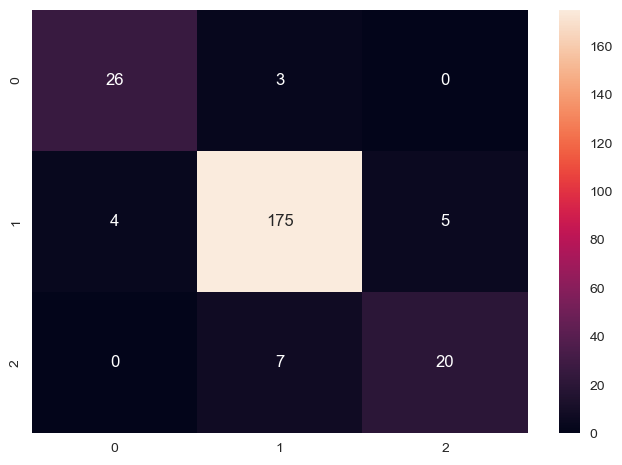

In [26]:
RF_cm=confusion_matrix(y_test,RF_hp_pred)
sns.heatmap(RF_cm,annot=True,fmt='g')

#### 5.4. NAIVE BAYES

In [27]:
NB_model=GaussianNB()
NB_model.fit(x_train_smote,y_train_smote)
NB_pred=NB_model.predict(x_test)

In [28]:
NB_accuracy = accuracy_score(y_test,NB_pred)
print(f"Test Accuracy: {NB_accuracy}")

Test Accuracy: 0.7083333333333334


#### 5.4.1.Hyperparameter Tuning

In [29]:
param_grid = {'var_smoothing': np.logspace(-12, -2, 100)}
NB = GaussianNB()

In [30]:
NB_search = RandomizedSearchCV(estimator=NB, param_distributions=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
NB_search.fit(x_train_smote, y_train_smote)
print(f"Best Parameters: {NB_search.best_params_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'var_smoothing': 1.2915496650148827e-11}


In [31]:
best_NB = NB_search.best_estimator_
NB_y_pred = best_NB.predict(x_test)
NB_hp_accuracy = accuracy_score(y_test, NB_y_pred)
print(f"Test Accuracy: {NB_hp_accuracy}")
print(classification_report(y_test,NB_y_pred))

Test Accuracy: 0.7083333333333334
              precision    recall  f1-score   support

           2       0.42      0.52      0.46        29
           3       0.86      0.76      0.80       184
           4       0.38      0.59      0.46        27

    accuracy                           0.71       240
   macro avg       0.55      0.62      0.58       240
weighted avg       0.75      0.71      0.72       240



<Axes: >

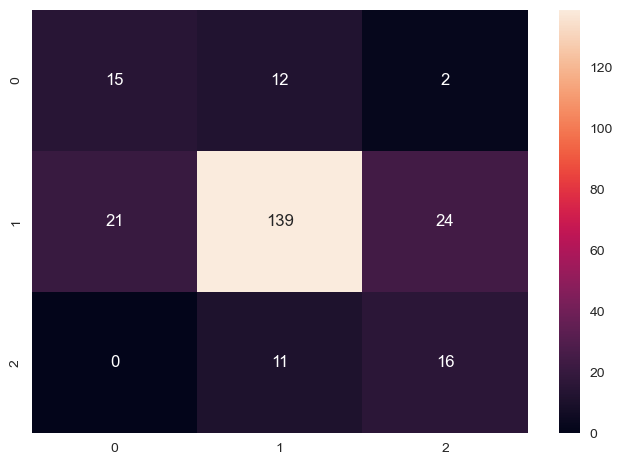

In [32]:
NB_cm=confusion_matrix(y_test,NB_y_pred)
sns.heatmap(NB_cm,annot=True,fmt='g')

#### 5.5.K NEAREST NEIGHBOR

In [33]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train_smote,y_train_smote)
KNN_pred=KNN_model.predict(x_test)

In [34]:
KNN_accuracy = accuracy_score(y_test, KNN_pred)
print(f"Test Accuracy: {KNN_accuracy}")

Test Accuracy: 0.5791666666666667


#### 5.5.1. Hyperparameter Tuning

In [35]:
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
KNN= KNeighborsClassifier()

In [36]:
KNN_cv = RandomizedSearchCV(estimator=KNN, param_distributions=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
KNN_cv.fit(x_train_smote, y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy', verbose=1)

In [37]:
print(f"Best Parameters: {KNN_cv.best_params_}")

Best Parameters: {'weights': 'uniform', 'n_neighbors': 1, 'metric': 'manhattan'}


In [38]:
best_KNN = KNN_cv.best_estimator_
KNN_hp_pred = best_KNN.predict(x_test)
KNN_hp_accuracy = accuracy_score(y_test, KNN_hp_pred)
print(f"Test Accuracy: {KNN_hp_accuracy}")
print(classification_report(y_test,KNN_hp_pred))

Test Accuracy: 0.6625
              precision    recall  f1-score   support

           2       0.36      0.55      0.44        29
           3       0.88      0.70      0.78       184
           4       0.29      0.52      0.37        27

    accuracy                           0.66       240
   macro avg       0.51      0.59      0.53       240
weighted avg       0.75      0.66      0.69       240



<Axes: >

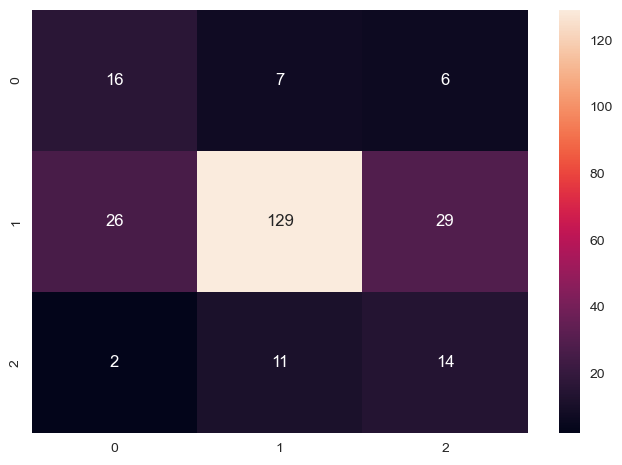

In [39]:
KNN_cm=confusion_matrix(y_test,KNN_hp_pred)
sns.heatmap(KNN_cm,annot=True,fmt='g')

#### 5.6 SUPPORT VECTOR CLASSIFIER

In [68]:
svc_model=SVC()
svc_model.fit(x_train_smote,y_train_smote)
svc_pred=svc_model.predict(x_test)

In [69]:
svc_accuracy = accuracy_score(y_test, svc_pred)
print(f"Test Accuracy: {svc_accuracy}")

Test Accuracy: 0.7583333333333333


#### 5.6.1.Hyperparameter Tuning

In [70]:
params={'kernel':['linear','rbf'],
        'degree':[1,2,3,4,5],
        'gamma':['scale', 'auto'],
        'C':[0.01,0.1, 1, 10, 100]
        }

In [71]:
svc_hpt_model=SVC()

In [72]:
svc_cv=RandomizedSearchCV(estimator=svc_hpt_model,
                    param_distributions=params,
                    scoring='accuracy',
                    cv=5,verbose=3,
                    n_jobs=-1)

In [73]:
svc_cv.fit(x_train_smote,y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']},
                   scoring='accuracy', verbose=3)

In [74]:
print(f'Best Parameters:{svc_cv.best_params_}')

Best Parameters:{'kernel': 'rbf', 'gamma': 'auto', 'degree': 3, 'C': 1}


In [75]:
best_svc = svc_cv.best_estimator_
svc_hp_pred = best_svc.predict(x_test)
svc_hp_accuracy = accuracy_score(y_test, svc_hp_pred)
print(f"Test Accuracy: {svc_hp_accuracy}")

Test Accuracy: 0.8375


In [48]:
print(classification_report(y_test,svc_hp_pred))

              precision    recall  f1-score   support

           2       0.65      0.59      0.62        29
           3       0.88      0.91      0.90       184
           4       0.62      0.56      0.59        27

    accuracy                           0.83       240
   macro avg       0.72      0.68      0.70       240
weighted avg       0.83      0.83      0.83       240



<Axes: >

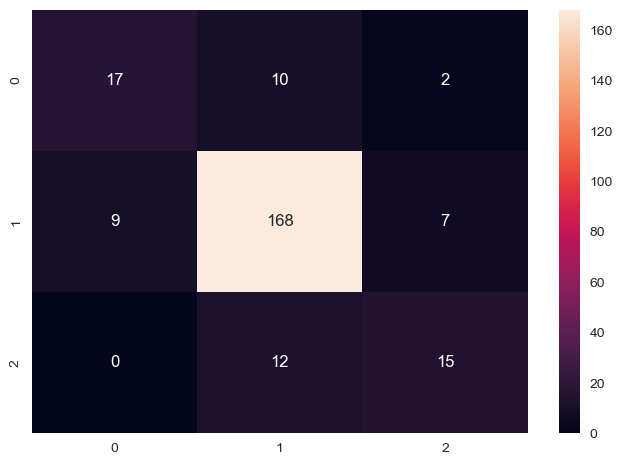

In [49]:
svc_cm=confusion_matrix(y_test,svc_hp_pred)
sns.heatmap(svc_cm,annot=True,fmt='g')

#### 5.7.ARTIFICIAL NEURAL NETWORK

In [50]:
ANN_model=MLPClassifier()
ANN_model.fit(x_train_smote,y_train_smote)
ANN_pred=ANN_model.predict(x_test)

In [51]:
ANN_accuracy = accuracy_score(y_test, ANN_pred)
print(f"Test Accuracy: {ANN_accuracy}")

Test Accuracy: 0.7875


#### 5.7.1.Hyperparameter Tuning

In [52]:
ANN_hpt_model = MLPClassifier(max_iter=500)


param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (50, 50, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

In [53]:
ann_cv= RandomizedSearchCV(ANN_hpt_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
ann_cv.fit(x_train_smote, y_train_smote)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=MLPClassifier(max_iter=500), n_jobs=-1,
                   param_distributions={'activation': ['relu', 'tanh',
                                                       'logistic'],
                                        'alpha': [0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [(50,), (100,),
                                                               (50, 50),
                                                               (100, 50),
                                                               (50, 50, 50)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['adam', 'sgd', 'lbfgs']},
                   scoring='accuracy', verbose=2)

In [54]:
#getting a best parameter
print(f'Best Parameters: {ann_cv.best_params_}')

Best Parameters: {'solver': 'lbfgs', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'alpha': 0.01, 'activation': 'tanh'}


In [55]:
# fitting the data
best_ann_model = ann_cv.best_estimator_
ann_hp_pred = best_svc.predict(x_test)

# Evaluating the model's performance
ann_hp_accuracy = accuracy_score(y_test, ann_hp_pred)
print(f"Test Accuracy: {ann_hp_accuracy}")

Test Accuracy: 0.8333333333333334


In [56]:
print(classification_report(y_test,ann_hp_pred))

              precision    recall  f1-score   support

           2       0.65      0.59      0.62        29
           3       0.88      0.91      0.90       184
           4       0.62      0.56      0.59        27

    accuracy                           0.83       240
   macro avg       0.72      0.68      0.70       240
weighted avg       0.83      0.83      0.83       240



<Axes: >

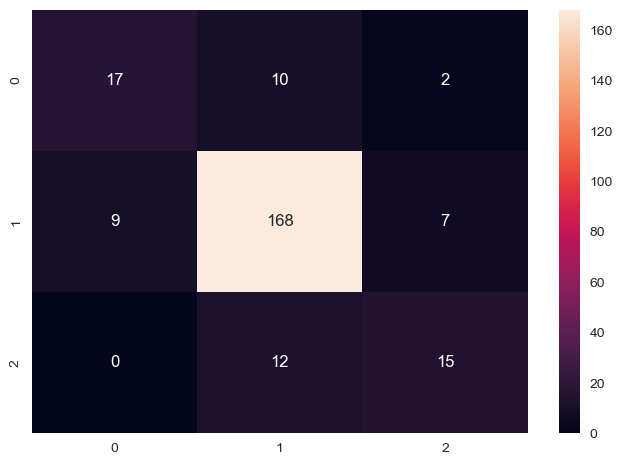

In [57]:
ann_cm=confusion_matrix(y_test,ann_hp_pred)
sns.heatmap(ann_cm,annot=True,fmt='g')

### 6.(Receiver Operating Characteristic - Area Under Curve) ROC-AUC SCORE FOR BEST MODEL

In [58]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_smote, y_train_smote)
y_probs = rf_model.predict_proba(x_test) 
roc_auc = roc_auc_score(y_test, y_probs,multi_class='ovr')
print(f"ROC-AUC Score for RandomForestClassifier: {roc_auc:.4f}")

ROC-AUC Score for RandomForestClassifier: 0.9491


In [59]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_smote, y_train_smote)
y_probs = rf_model.predict_proba(x_test)

roc_auc_per_class = {}
for i, class_label in enumerate(rf_model.classes_):
    roc_auc_per_class[class_label] = roc_auc_score((y_test == class_label).astype(int), y_probs[:, i])

for class_label, auc_score in roc_auc_per_class.items():
    print(f"ROC-AUC Score for Class {class_label}: {auc_score}")

macro_avg_auc = roc_auc_score(y_test, y_probs, multi_class="ovr", average="macro")
micro_avg_auc = roc_auc_score(y_test, y_probs, multi_class="ovr", average="micro")

print(f"\nMacro-Average ROC-AUC Score: {macro_avg_auc}")
print(f"Micro-Average ROC-AUC Score: {micro_avg_auc}")

ROC-AUC Score for Class 2: 0.9925641444680503
ROC-AUC Score for Class 3: 0.9417701863354038
ROC-AUC Score for Class 4: 0.9300121717962093

Macro-Average ROC-AUC Score: 0.9547821675332212
Micro-Average ROC-AUC Score: 0.9812586805555555


### 7.Model Comparison Report

In [76]:
comparison_dict = {'Model':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','KNN','NaiveBayes','ANN'],
                   'Accuracy':[log_accuracy,dec_hp_accuracy,RF_hp_accuracy,svc_hp_accuracy,KNN_hp_accuracy,NB_hp_accuracy,ann_hp_accuracy]
                  }
    

# Creating DataFrame
comparison_df = pd.DataFrame(comparison_dict)
print(comparison_df)

                    Model  Accuracy
0      LogisticRegression  0.729167
1  DecisionTreeClassifier  0.891667
2  RandomForestClassifier  0.920833
3                     SVC  0.837500
4                     KNN  0.662500
5              NaiveBayes  0.708333
6                     ANN  0.833333


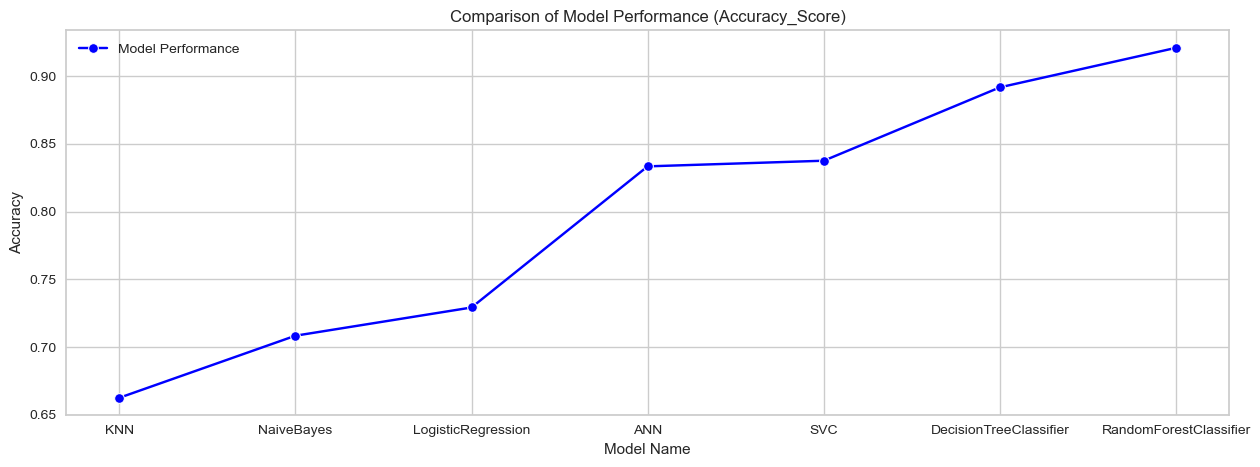

In [77]:

comparison_df = comparison_df.sort_values(by='Accuracy', ascending=True)
max_index = comparison_df['Accuracy'].idxmax() 
plt.figure(figsize=(15, 5))
sns.lineplot(data=comparison_df, x='Model', y='Accuracy', marker='o', color='blue', label="Model Performance")
plt.xlabel("Model Name")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Comparison of Model Performance (Accuracy_Score)")
plt.show()
